In [37]:
using PyPlot

In [45]:
include("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw5/Iryna_Margaret/planet_moon_star_copy.jl")

planet_moon_star (generic function with 1 method)

In [28]:
#Function to create an array with a circle made of 1's of a given radius in Einstein Radii
function makecircle(r)
    length = 1000
    map = zeros(Float64, length, length)
    for i in range(1, length)
        for j in range(1, length)
            X = (i - 1/2 - length/2.)*(10/length) #multiplied by factors at end to convert from cells to R_E
            Y = (j - 1/2 - length/2.)*(4/length)  #multiplied by factors at end to convert from cells to R_E
            dist = sqrt(X^2 + Y^2) #Distance between points in terms of R_E
            if dist <= r
                map[i,j] = 1.0
            end
        end
    end
    return map
end

makecircle (generic function with 1 method)

In [42]:
yplanet = 1.3
y1moon = 0.0
y2moon = 0.0
eps1 = 1e-5
eps2 = 0.5
lensing_map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2) ;

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/10000
Range of grid, y1: 1.284188611699158 1.2892277011506363 1.315811388300842 1.310835544402567
Range of grid, y2: -0.047434164902525694 -0.017621792261288294 0.047434164902525694 0.017621792261288294


In [31]:
circle = makecircle(0.25) ;

In [43]:
radii = linspace(0.25, 4.0, 10)
maxmag = zeros(length(radii))

for i in range(1, length(radii))
    println("Radius = ", radii[i])
    circle = makecircle(radii[i])
    convolution = conv2(circle, lensing_map)
    maxmag[i] = maximum(convolution)
end

Radius = 0.25
Radius = 0.6666666666666666
Radius = 1.0833333333333333
Radius = 1.5
Radius = 1.9166666666666667
Radius = 2.3333333333333335
Radius = 2.75
Radius = 3.1666666666666665
Radius = 3.5833333333333335
Radius = 4.0


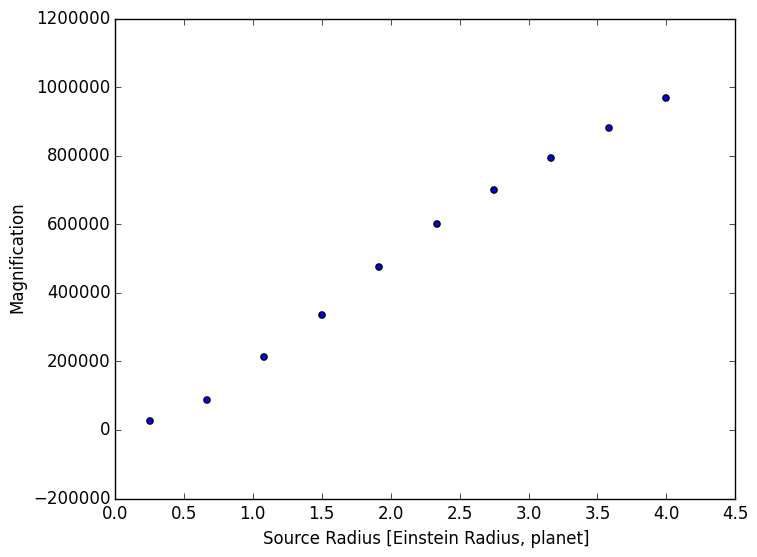

PyObject <matplotlib.text.Text object at 0x31479ed50>

In [46]:
scatter(radii, maxmag)
xlabel("Source Radius [Einstein Radius, planet]")
ylabel("Magnification")